In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/kaggle/input/bmw-cars-dataset-analysis-with-visualizations/bmw.csv")

# Display first few records
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


### Insight:
### Checks structure, column names, and sample BMW listings.

In [2]:
print("Shape:", df.shape)
print("\nInfo:")
print(df.info())

print("\nMissing Values:\n", df.isnull().sum())
print("\nSummary Statistics:\n", df.describe())

Shape: (10781, 9)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB
None

Missing Values:
 model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

Summary Statistics:
                year          price        mileage           tax           mpg  \
count  10781.000000   10781.0

### Insight:
### Shape → confirms rows and columns (10,781 × 9).
### info() → identifies data types (numeric vs categorical).
### isnull() → detects missing data for cleaning.
### describe() → gives numerical stats like mean price, mileage, mpg.

In [4]:
# Fill missing numeric columns with mean
num_cols = ['price', 'mileage', 'engine_size', 'mpg', 'tax', 'year']
for col in num_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mean())

# Fill missing categorical columns with mode
cat_cols = ['model', 'fuel_type', 'transmission']
for col in cat_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])

### Insight:
### Ensures no nulls — essential before grouping or plotting.
### Keeps dataset ready for ML or EDA.

In [9]:
avg_price = df['price'].mean()
print("Average Price (£):", avg_price)
avg_mileage = df['mileage'].mean()
print("Average Mileage (miles):", avg_mileage)
avg_mpg = df['mpg'].mean()
print("Average Fuel Efficiency (mpg):", avg_mpg)
transmission_counts = df['transmission'].value_counts()
print("Cars by Transmission Type:\n", transmission_counts)
fuel_counts = df['fuelType'].value_counts()
print("Cars by Fuel Type:\n", fuel_counts)

Average Price (£): 22733.408867452
Average Mileage (miles): 25496.986550412763
Average Fuel Efficiency (mpg): 56.39903533994991
Cars by Transmission Type:
 transmission
Semi-Auto    4666
Automatic    3588
Manual       2527
Name: count, dtype: int64
Cars by Fuel Type:
 fuelType
Diesel      7027
Petrol      3417
Hybrid       298
Other         36
Electric       3
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


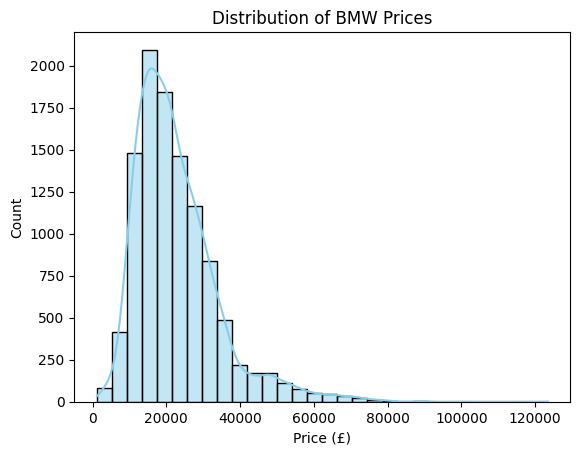

In [10]:
sns.histplot(df['price'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of BMW Prices")
plt.xlabel("Price (£)")
plt.show()

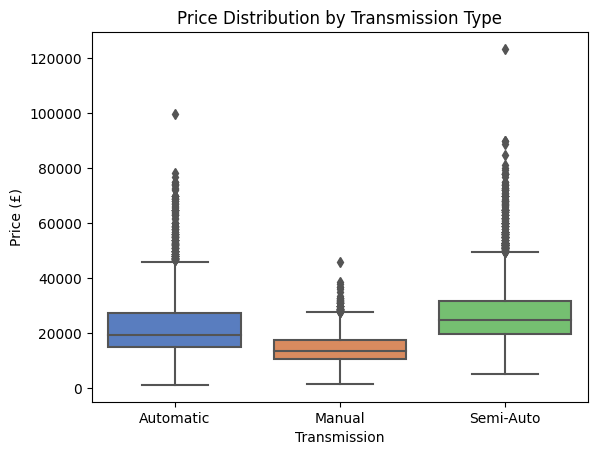

In [11]:
sns.boxplot(x='transmission', y='price', data=df, palette='muted')
plt.title("Price Distribution by Transmission Type")
plt.xlabel("Transmission")
plt.ylabel("Price (£)")
plt.show()

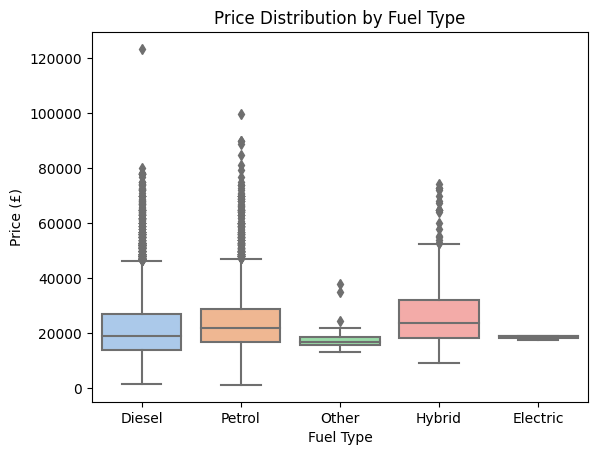

In [13]:
sns.boxplot(x='fuelType', y='price', data=df, palette='pastel')
plt.title("Price Distribution by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Price (£)")
plt.show()

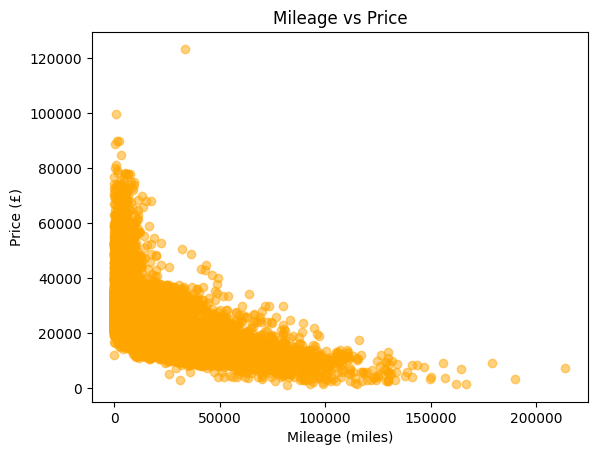

In [14]:
plt.scatter(df['mileage'], df['price'], alpha=0.5, color='orange')
plt.title("Mileage vs Price")
plt.xlabel("Mileage (miles)")
plt.ylabel("Price (£)")
plt.show()

### Insight:
### Reveals negative correlation — higher mileage → lower resale price.

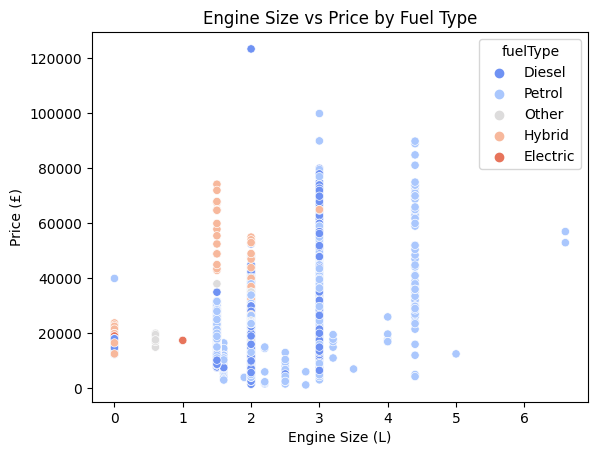

In [17]:
sns.scatterplot(x='engineSize', y='price', data=df, hue='fuelType', palette='coolwarm')
plt.title("Engine Size vs Price by Fuel Type")
plt.xlabel("Engine Size (L)")
plt.ylabel("Price (£)")
plt.show()

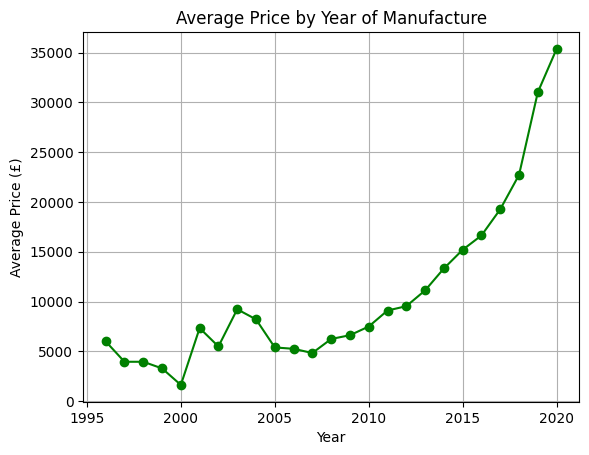

In [18]:
avg_price_by_year = df.groupby('year')['price'].mean()
plt.plot(avg_price_by_year.index, avg_price_by_year.values, marker='o', color='green')
plt.title("Average Price by Year of Manufacture")
plt.xlabel("Year")
plt.ylabel("Average Price (£)")
plt.grid(True)
plt.show()

### Insight:
### Shows depreciation trend over years.

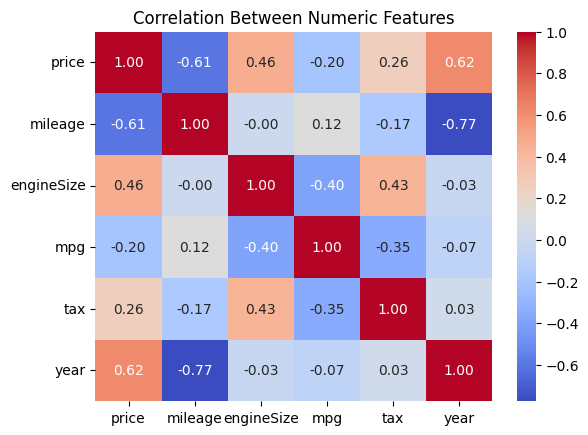

In [20]:
numeric_cols = ['price', 'mileage', 'engineSize', 'mpg', 'tax', 'year']
corr = df[numeric_cols].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Numeric Features")
plt.show()

### Insight:
### High positive correlation → larger engine = higher price.
### Negative correlation → higher mileage = lower price.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

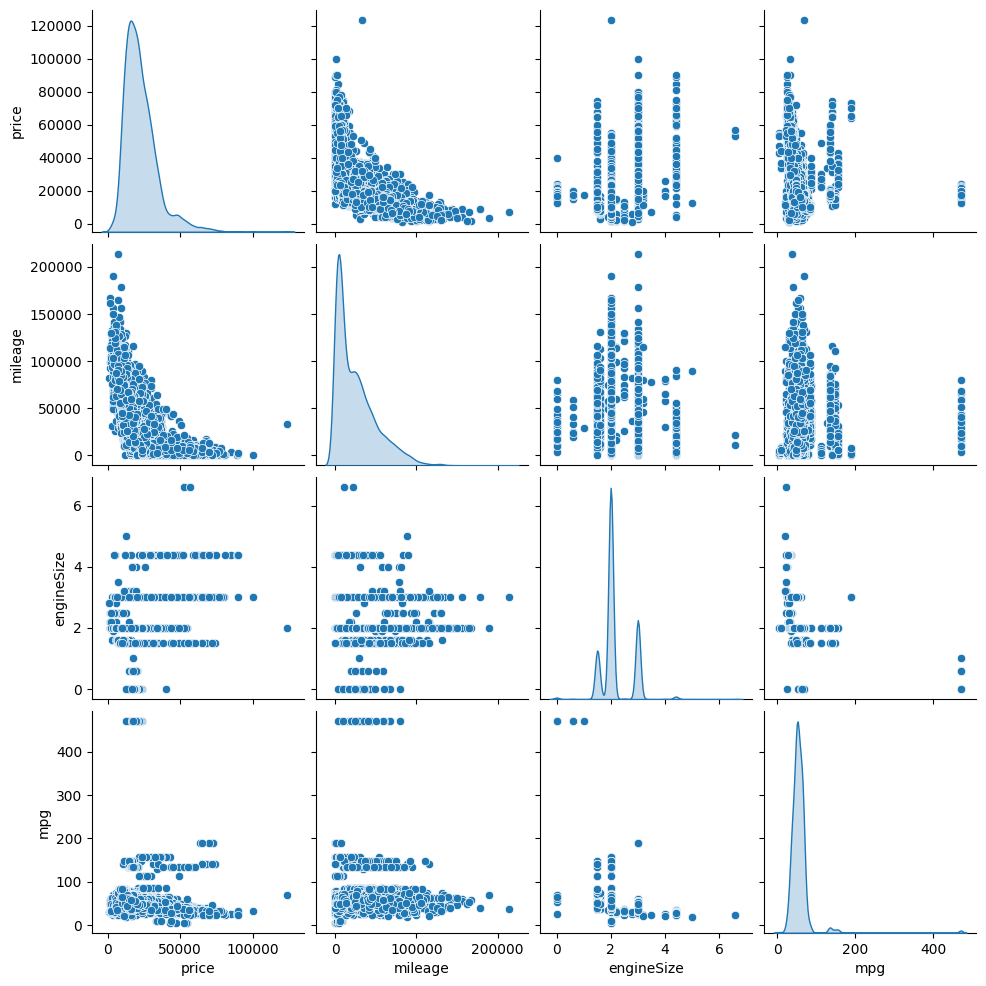

In [22]:
sns.pairplot(df[['price', 'mileage', 'engineSize', 'mpg']], diag_kind='kde')
plt.show()

### Insight:
### Gives quick multivariate visual overview.